In [28]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

import dlib

In [29]:
class Align:
    def __init__(self, predictor_path):
        self.detector = dlib.get_frontal_face_detector()
        self.sp = dlib.shape_predictor(predictor_path)

    def align(self, rgbImg, imgDim=224):
        dets = self.detector(rgbImg, 1) 
        if len(dets) == 0:
            return

        faces = dlib.full_object_detections()
        for detection in dets:
            faces.append(self.sp(rgbImg, detection))

        images = dlib.get_face_chips(rgbImg, faces, size=imgDim)
        return images

In [34]:
def load_img(path):
    img = cv2.imread(path, 1)
    img = img[..., ::-1]
    return img

In [36]:
def align_img(rgbImg, imgDim=96, pred_path='shape_predictor_5_face_landmarks.dat'):
    return Align(pred_path).align(rgbImg, imgDim)

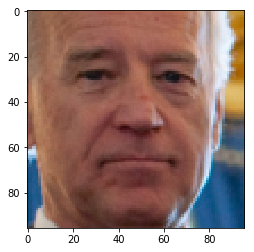

In [38]:
img = load_img('Biben.jpg')
align_faces = align_img(img)
plt.imshow(align_faces[0])